Exploratory Data Analysis

In [6]:
# Import the organization modules
import pandas as pd
import numpy as np
# Import module to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Import the plot modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import own scripts
from scripts.data_cleaning import (
    read_all_csvs, 
    clean_data,
    create_csv
    )

In [7]:
# Create data frame from all single CSV files
df = read_all_csvs()
# Clean the data
df = clean_data(df)

In [8]:

df

,backers_count,country,original_currency,disable_communication,goal,project_id,is_starrable,launched_at,name,pledged,...,state_changed_at_month,state_changed_at_day,deadline_year,deadline_month,deadline_day,category_name,category_id,category_sub,creator_name,location_name
0,21,US,USD,False,200.0,287514992,False,1388011046,New Final Round Album,802.0,...,2,8,2014,2,8,music,43,rock,Daniel,Chicago
1,97,US,USD,False,400.0,385129759,False,1550073611,Princess Pals Enamel Pin Series,2259.0,...,3,5,2019,3,5,art,54,mixed media,Katherine,Sacramento
2,88,US,USD,False,27224.0,681033598,False,1478012330,Their Life Through Their Lens-the Amish and Me...,29638.0,...,12,1,2016,12,1,photography,280,photobooks,MelissaThomas,Columbus
3,193,IT,EUR,False,40000.0,1031782682,False,1540684582,WAO: THE ECO EFFECT SHOES,43180.0,...,12,8,2018,12,8,fashion,266,footwear,WAO,Venice
4,20,US,USD,False,1000.0,904085819,False,1425919017,Apple Watch Development Course,549.0,...,4,8,2015,4,8,technology,51,software,Kalpit Jain,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,57,US,USD,False,10000.0,1075220536,False,1488287545,Steam Hollow Brewery and Taproom,10320.0,...,4,14,2017,4,14,food,307,drinks,Blane White,Manteno
961,11,AU,AUD,False,8000.0,298098561,False,1451121309,Fusion Detox - Chef Alan Wichert creates THE h...,435.0,...,1,25,2016,1,25,food,306,cookbooks,Alan Wichert,Sydney
962,0,US,USD,False,8000.0,2048460852,False,1472245753,Gorgeous Princess Cheetah Collection,0.0,...,9,25,2016,9,25,fashion,264,childrenswear,T. Simms,Dover
963,11,US,USD,False,1000.0,1124247806,False,1424188645,"""The Lion & The Lyceum"" Children's Book - Base...",1400.0,...,3,19,2015,3,19,publishing,46,children's books,Alex Beene,Nashville


In [ ]:
import seaborn as sns
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta

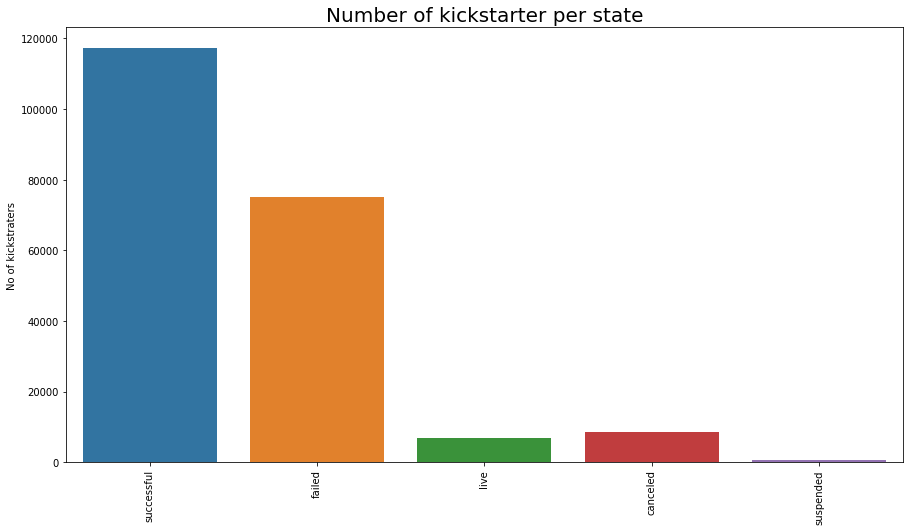

In [20]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['state']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of kickstraters", fontsize = 10); # set label for y-axis
f1.set_title('Number of kickstarter per state', fontsize=20); # set title

Live state eventuell droppen

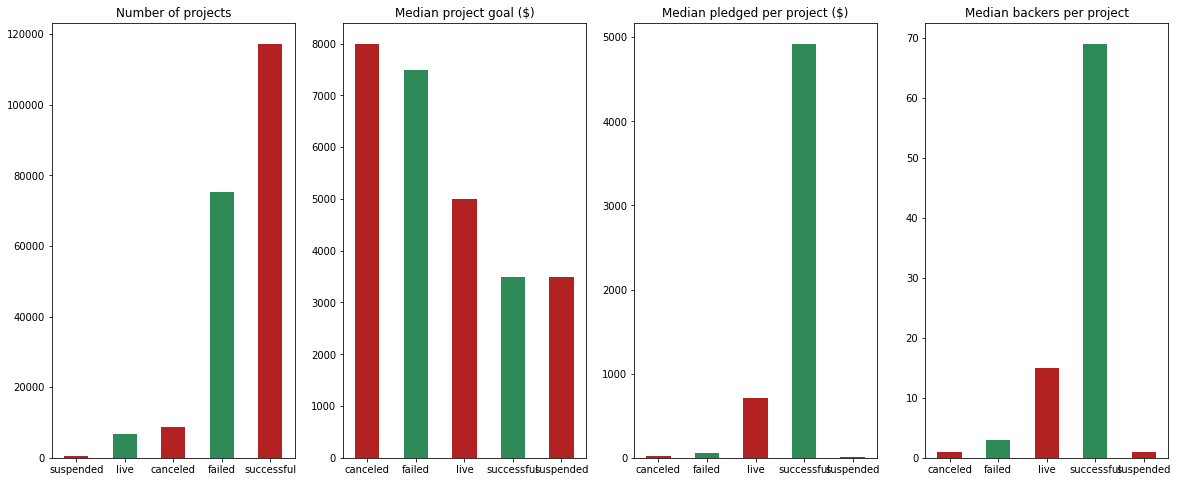

In [10]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20,8))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')


fig.subplots_adjust(hspace=0.3)
plt.show()

Baseline models

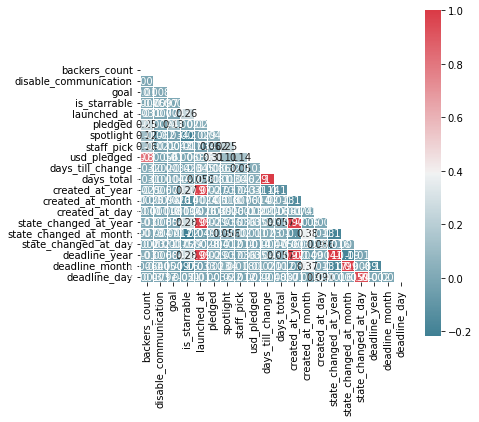

In [23]:
# Compute correlations
correlations = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=.5, cbar_kws={"shrink": 1.5});